In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [96]:
df = pd.read_excel("Height-Width.xlsx")

# Data Analysis

In [97]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [98]:
df.Height.std()

2.8585833281420983

In [99]:
df.shape

(3501, 2)

In [100]:
row, col =df.shape

In [101]:
row

3501

In [102]:
col

2

In [103]:
df.isnull()

,Height,Weight
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [104]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualizaton

Text(0.5, 1.0, 'Height-Weight')

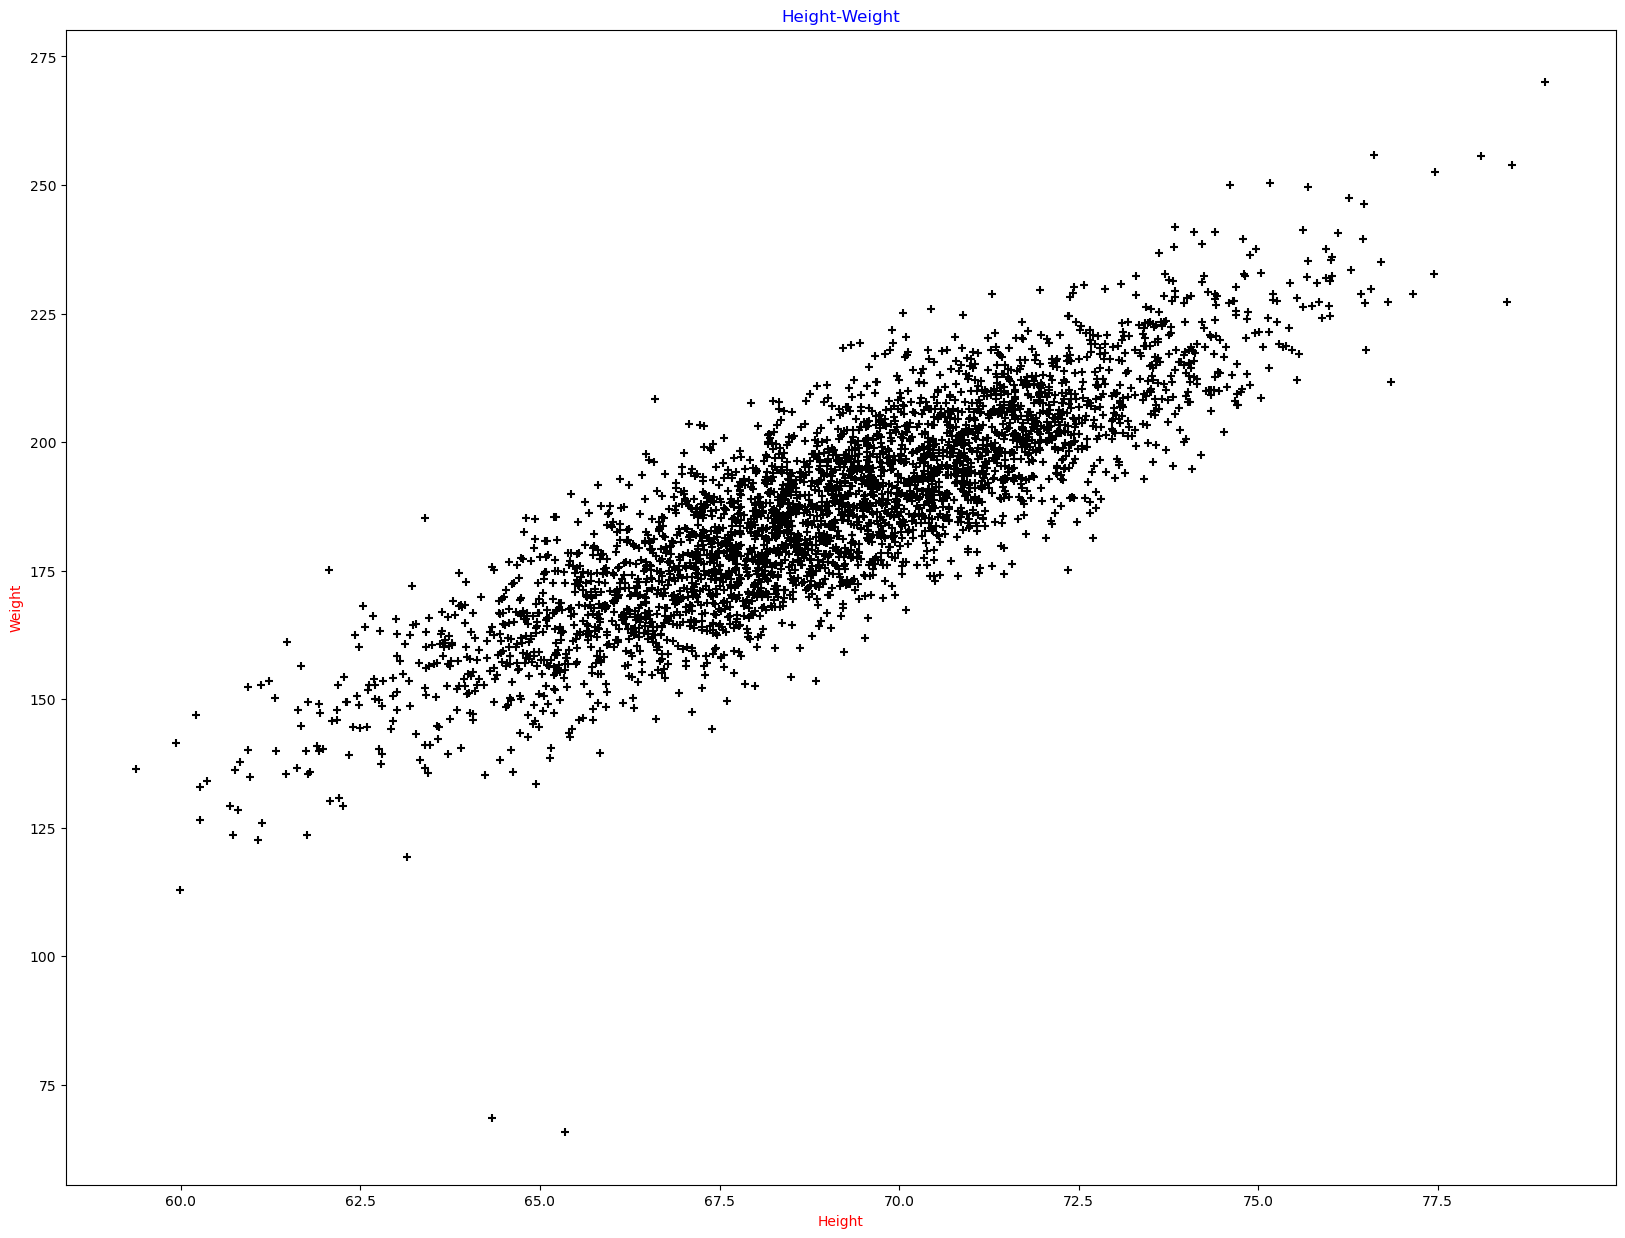

In [105]:
plt.figure(figsize=(20,15))
plt.scatter(df.Height, df.Weight, marker="+", color="black")
plt.xlabel("Height", color="red")
plt.ylabel("Weight", color="red")
plt.title("Height-Weight", color="blue")

In [106]:
x = df[['Height']] 

In [107]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [108]:
#input x is feature, prediction is level

In [109]:
y= df[['Weight']]
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [110]:
from sklearn.model_selection import train_test_split as tts 

In [111]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=5)

In [112]:
xtrain.head()

,Height
3466,67.172828
828,66.653234
2234,65.077902
3245,65.035786
1298,69.702258


In [113]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [114]:
ytrain.head()

,Weight
3466,181.886241
828,160.147436
2234,165.313807
3245,168.618676
1298,177.149091


In [115]:
ytest.head()

,Weight
2730,167.842391
2008,193.601091
840,196.763907
2635,208.204435
1721,191.683842


# Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
reg = LinearRegression() #object

In [118]:
reg.fit(xtrain,ytrain) #fit mathod train machine through linear regressin algorithm 

LinearRegression()

In [119]:
m = reg.coef_ #y = mx+c----m= coefficient

In [120]:
m

array([[6.00809929]])

In [121]:
c = reg.intercept_
c

array([-227.77595602])

In [122]:
 #y = mx+c

In [123]:
y =m*70+c #manually
y

array([[192.79099393]])

In [124]:
reg.predict([[70]]) #by predict function

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[192.79099393]])

In [125]:
reg.predict(xtest)

array([[156.22895255],
       [171.26045447],
       [186.87942774],
       ...,
       [205.60020285],
       [186.14253731],
       [219.24585226]])

In [126]:
pred =reg.predict(xtest)
pred

array([[156.22895255],
       [171.26045447],
       [186.87942774],
       ...,
       [205.60020285],
       [186.14253731],
       [219.24585226]])

In [127]:
df["Predicted Result"] = reg.predict(x)

In [128]:
df.head()

,Height,Weight,Predicted Result
0,73.847017,241.893563,215.904254
1,68.781904,162.310473,185.472553
2,74.110105,212.740856,217.484915
3,71.730978,220.042470,203.190884
4,69.881796,206.349801,192.080812


In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [130]:
mse = mean_squared_error(ytest,pred)
mse

102.60138482843213

In [131]:
mae =mean_absolute_error(ytest,pred)
mae

8.061150778858023

# Best Fit Line

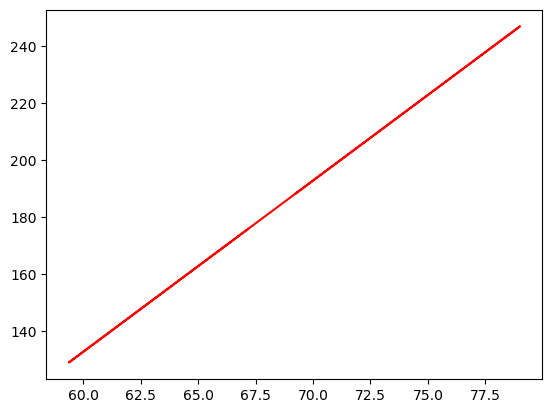

In [132]:
plt.plot(xtrain,reg.predict(xtrain), color="red")

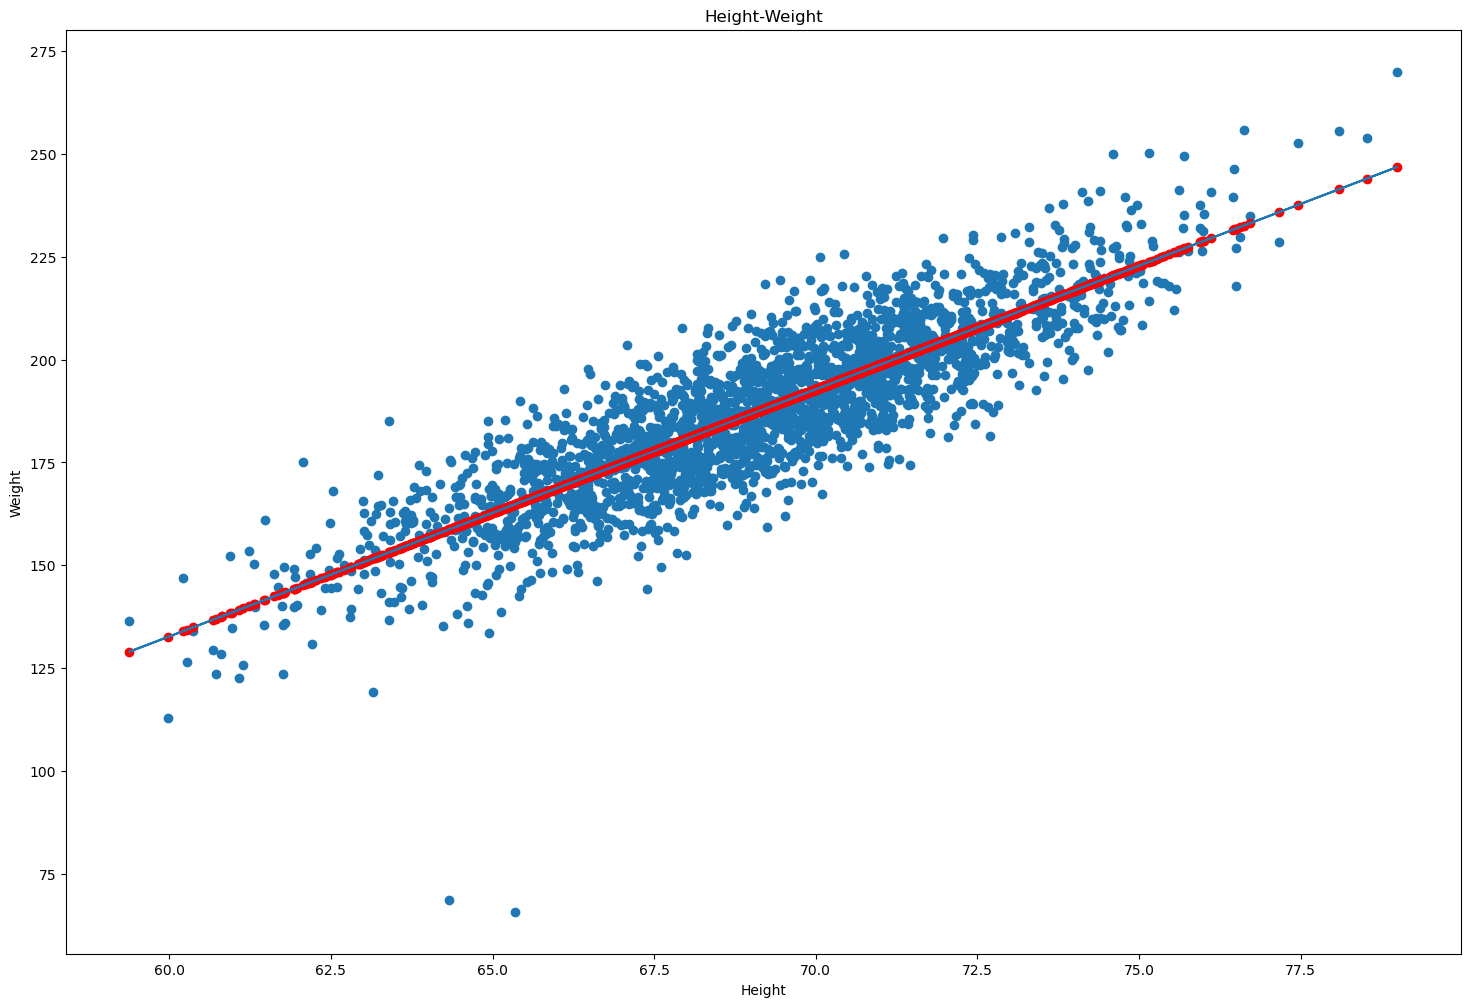

In [136]:
plt.figure(figsize=(18,12))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain))
plt.scatter(xtrain,reg.predict(xtrain),color="red")

In [138]:
from sklearn.metrics import r2_score
r2_score(ytest,pred) #accuracy

0.7302328605746943

In [140]:
xtrain.to_csv("xtest.csv") # created dataset by pandas

In [141]:
xtest.head()

,Height
2730,63.914541
2008,66.416414
840,69.016067
2635,71.948486
1721,71.196587


In [143]:
len(xtest) #row

1051

# Save Model

In [148]:
import pickle as pk #2 types of way to save model
import joblib as jb

In [147]:
pk.dump(reg,open("First","wb")) #model save and create binary file, wb=write binary 

In [155]:
reg2 = pk.load(open("First","rb")) #rb=read binary

In [156]:
reg2.predict([[2000]])

array([[11788.42261415]])

In [154]:
import warnings
warnings.filterwarnings("ignore")

In [157]:
jb.dump(reg,"Second")

['Second']